# **1.** **Importing Modeling** & **Feature Engineering** liberaries

In [58]:
import seaborn as sns
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

## **1.1.** Setting style to **ggplot**

In [59]:
plt.style.use('ggplot')
%matplotlib inline

## **1.2.** Setting plot **Size**, **Font** & **Mode**

In [60]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font' , **font)
plt.rcParams['savefig.dpi'] = 480
plt.rcParams["figure.figsize"] = (40, 30)

# **2.** Importing Data to **DataFram**

In [61]:
train_df = pd.read_csv("./resources/originalData/train.csv").drop(columns=['ID'])
test_df = pd.read_csv("./resources/originalData/test.csv")
train_data_count = train_df.count()[0]
print("Train data samples count:",train_data_count)

Train data samples count: 10834


In [62]:
# sira_t= train_df[train_df['y']=='SIRA']
# train_df.loc[train_df[train_df['y']=='SIRA'].index,'y'] = np.nan
# train_df.dropna(inplace=True)
# train_df = pd.concat([sira_t[sira_t['Area']>42000],train_df],axis=0)

## **2.1. Merging DataFrams**

In [63]:
train_data_count = train_df.count()
dry_bean_df = pd.concat([train_df,test_df],axis=0)
dry_bean_y_df = dry_bean_df['y']
dry_bean_x_df = dry_bean_df.drop(columns=['y'])

In [64]:
train_df.y.value_counts()

DERMASON    2837
SEKER       1621
SIRA        1512
HOROZ       1488
CALI        1304
BARBUNYA    1057
BOMBAY       418
Name: y, dtype: int64

# **3.** Feature Engineering

## **3.1** Standardization

In [65]:
train_df['Area']

4        42530
9        44492
13       46671
28       46602
43       54079
         ...  
10828    63169
10829    37777
10830    32187
10831    81837
10833    28026
Name: Area, Length: 10237, dtype: int64

In [66]:
standered_scaler = PowerTransformer(method='box-cox', standardize=True)
train_standardized = pd.DataFrame(standered_scaler.fit_transform(train_df.drop(columns='y')),columns=train_df.drop(columns='y').columns.to_list())
# test_standardized = standered_scaler.transform(test_df.drop(columns='ID'))

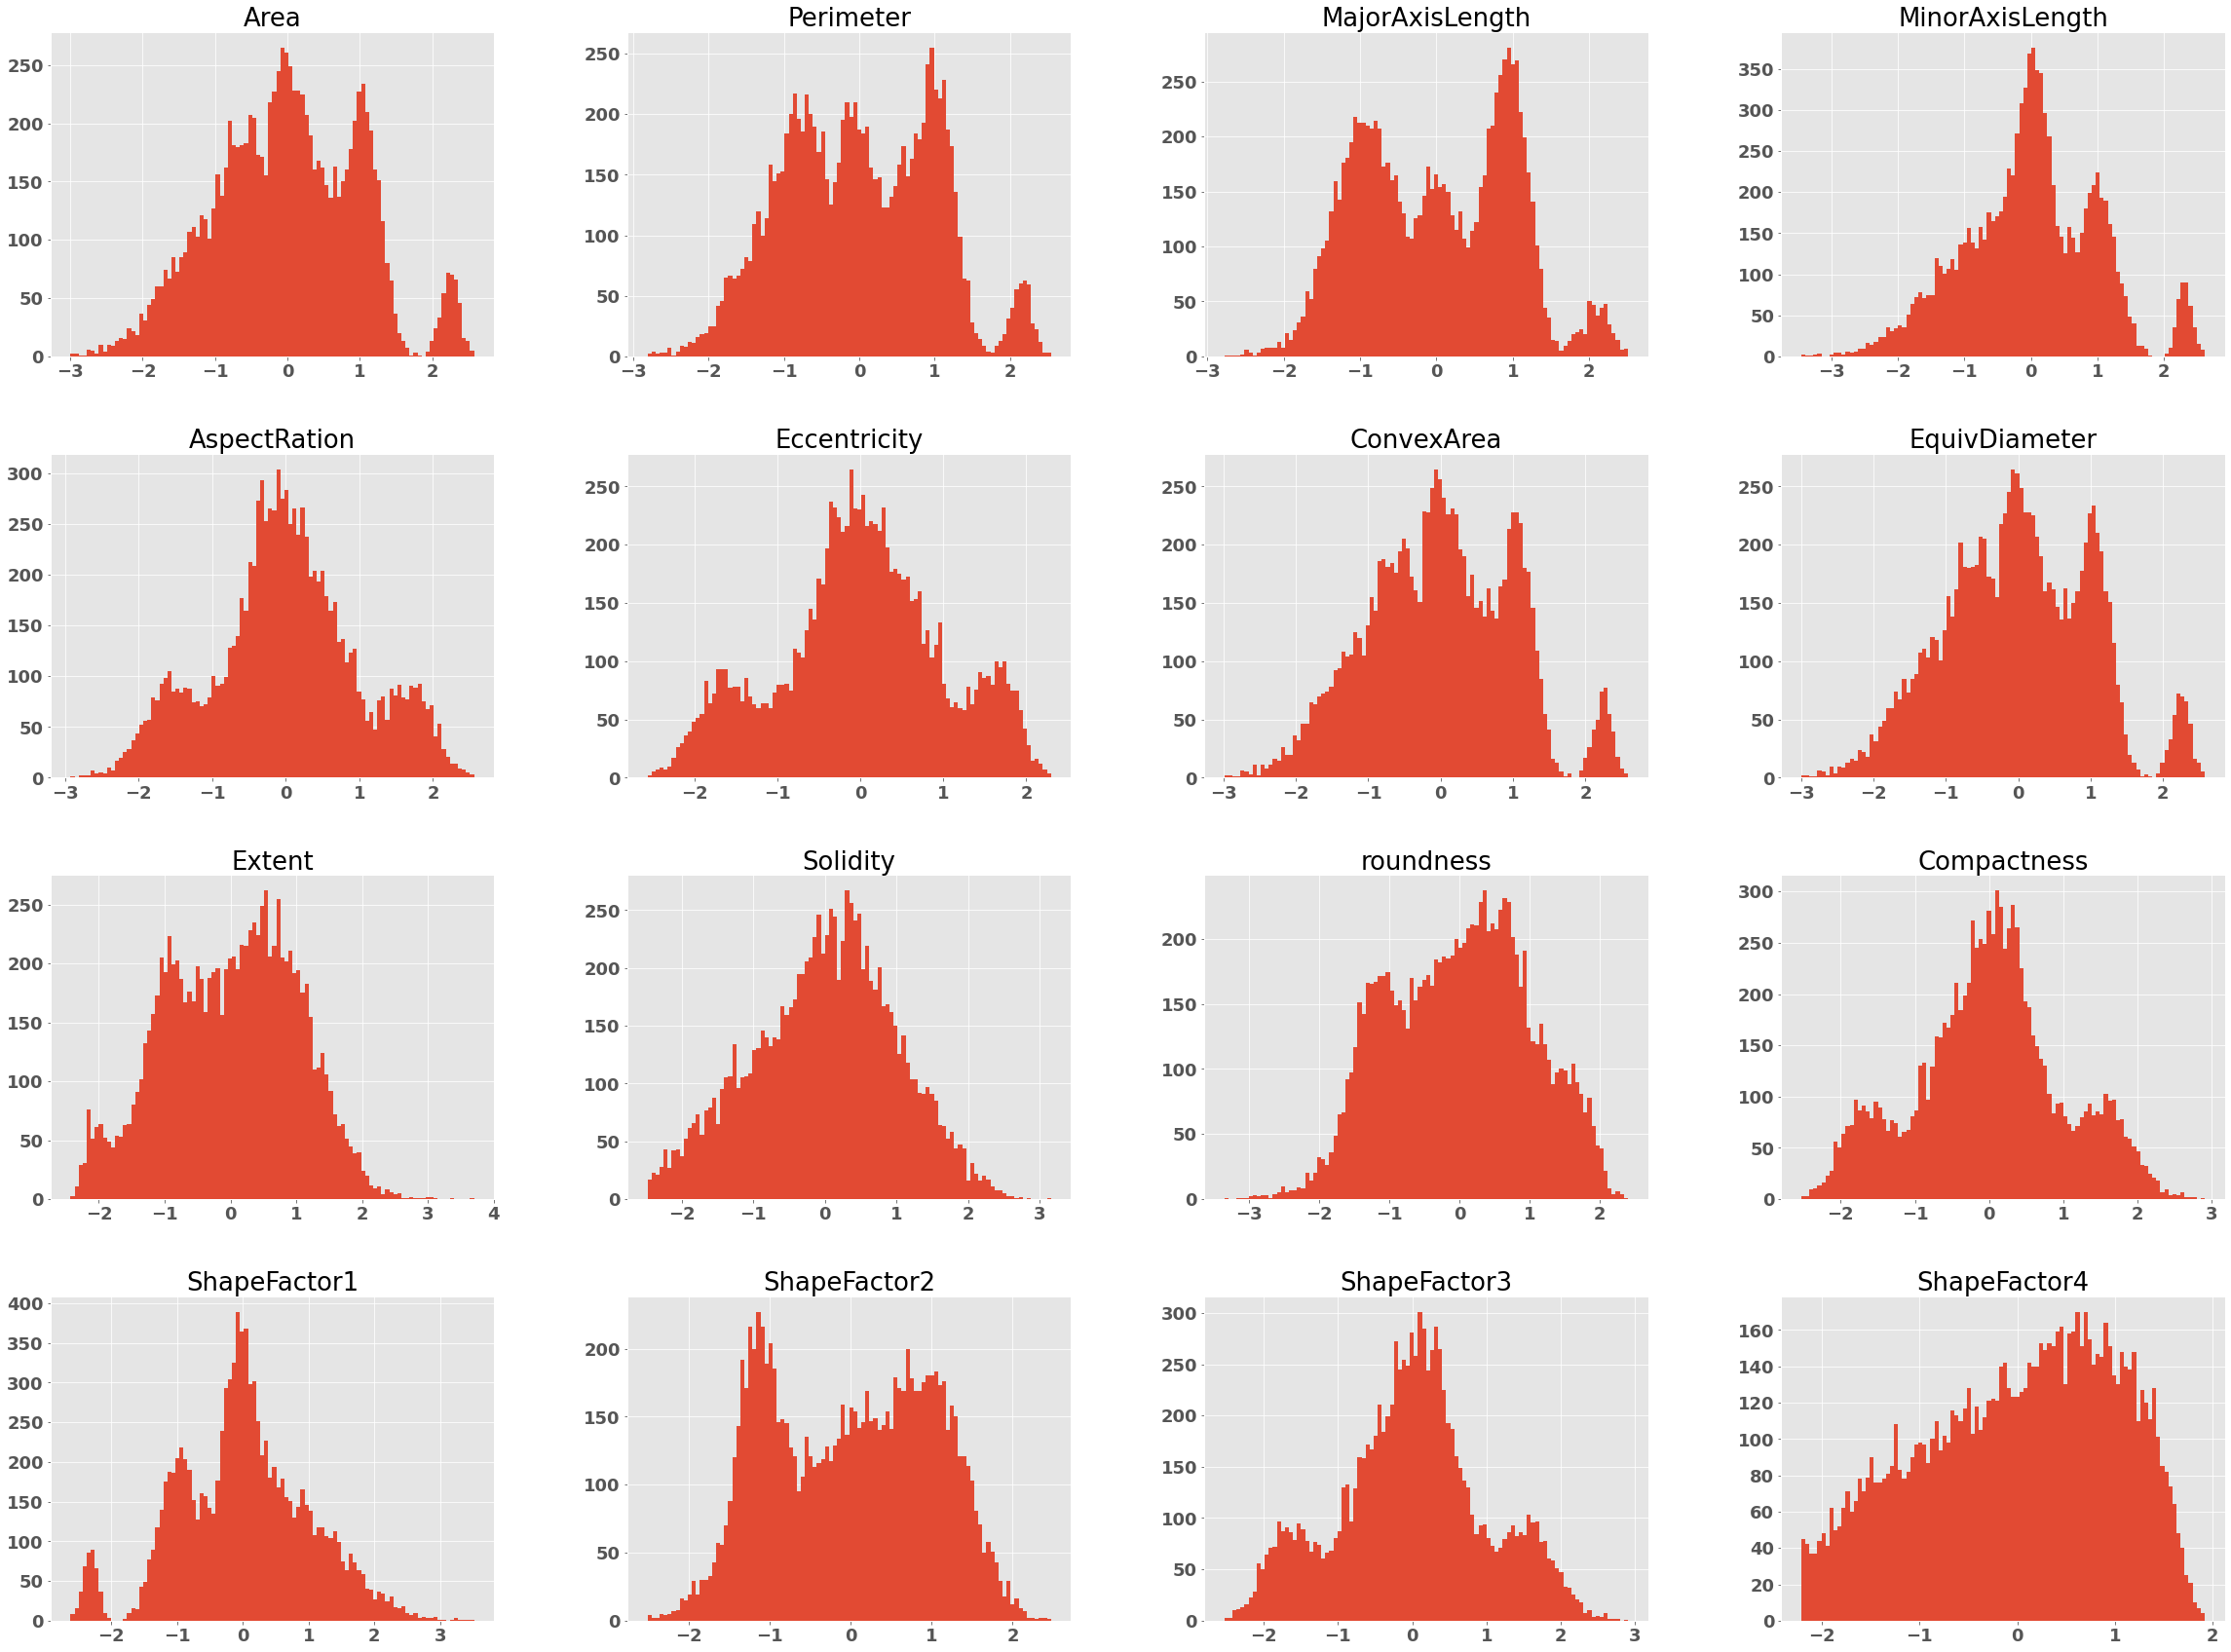

In [67]:
train_standardized.hist(bins=100);

## **3.2.** PCA

In [68]:
# pca = PCA(n_components=9)
# pca_x_data = pca.fit_transform(train_standardized)

In [69]:
# pca_df = pd.concat([pd.DataFrame(pca_x_data),train_df['y']],axis=1)

## **3.3.** PLS


In [70]:
train_standardized

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,-0.20,-0.23,-0.33,-0.01,-0.45,-0.45,-0.21,-0.20,-0.58,0.10,0.17,0.45,0.00,0.45,0.45,0.17
1,-0.08,-0.16,-0.07,-0.10,0.03,0.05,-0.09,-0.08,0.37,1.35,0.48,-0.00,0.08,0.09,-0.00,1.01
2,0.05,0.05,0.20,-0.19,0.53,0.57,0.05,0.05,-0.36,0.27,-0.15,-0.52,0.19,-0.31,-0.52,-0.41
3,0.05,-0.01,0.05,0.02,0.07,0.10,0.04,0.05,0.10,0.45,0.22,-0.06,-0.03,-0.01,-0.06,0.35
4,0.42,0.38,0.54,0.17,0.69,0.73,0.42,0.42,-0.01,0.23,-0.12,-0.67,-0.18,-0.60,-0.67,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,0.77,0.76,0.73,0.72,0.35,0.39,0.77,0.77,-0.75,-0.10,-0.60,-0.37,-0.71,-0.61,-0.37,-1.34
10233,-0.56,-0.66,-0.90,-0.03,-1.22,-1.27,-0.56,-0.56,0.32,0.51,0.90,1.22,0.01,1.13,1.22,0.71
10234,-1.09,-1.07,-0.95,-1.06,-0.27,-0.26,-1.08,-1.09,-0.54,-0.07,0.52,0.29,1.05,0.74,0.29,0.68
10235,1.26,1.19,1.29,1.09,0.89,0.93,1.25,1.26,0.36,1.23,-0.39,-0.89,-1.09,-1.24,-0.89,-0.55


In [71]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=9)
pls2.fit(train_standardized.iloc[:,:], pd.factorize(train_df['y'])[0])
pls_x_data = pls2.transform(train_standardized)

### Construct **train** dataframe from **tsne** and **pca**

In [72]:
# train_transformed =  pd.concat([train_standardized,tsne_df,train_df['y']],axis=1)
# train_transformed = train_standardized#.drop(columns=['ShapeFactor3','Compactness','AspectRation','Area','MajorAxisLength','MinorAxisLength','ConvexArea','EquivDiameter','ShapeFactor1'])

train_transformed = pd.DataFrame(pls_x_data)


In [73]:
train_transformed.sample(1)

,0,1,2,3,4,5,6,7,8
3343,1.85,-0.31,0.59,0.18,-0.21,0.03,0.28,-0.05,0.01


In [74]:
train_transformed_x , x_val, train_transformed_y, y_val = train_test_split(train_transformed,train_df['y'],test_size=0.2,random_state=42)

## **3.4.** Balance clases

In [75]:
train_transformed_y.value_counts()

DERMASON    2271
SEKER       1294
SIRA        1197
HOROZ       1178
CALI        1039
BARBUNYA     868
BOMBAY       342
Name: y, dtype: int64

In [76]:
train_df.y.unique().tolist()

['SIRA', 'HOROZ', 'SEKER', 'DERMASON', 'BARBUNYA', 'CALI', 'BOMBAY']

In [77]:
weights = dict(zip(train_df.y.unique(),[2000,1285,2282,1800,825,1050,339]))

In [78]:
smote = SMOTE(sampling_strategy=weights)
x_smote_balance,y_smote_balance = smote.fit_resample(train_transformed_x,train_transformed_y)

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 2271 samples and 1800 samples are asked.

##########################################

In [79]:
from lazypredict.Supervised import LazyClassifier
def lazy_pridict(X,Y,top_model_num=10):
    lazy_model = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
    x_train,_,y_train,_ = train_test_split(X,Y,test_size=0.2,random_state=42)
    _ ,test=lazy_model.fit(x_train,x_val_p,y_train,y_val_p)
    display(test.head(top_model_num))
lazy_pridict(train_transformed_x,train_transformed_y)

100%|██████████| 29/29 [00:16<00:00,  1.80it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.76,0.73,None,0.76,0.58
RandomForestClassifier,0.76,0.73,None,0.75,1.67
BaggingClassifier,0.73,0.72,None,0.73,0.51
XGBClassifier,0.75,0.72,None,0.75,2.43
DecisionTreeClassifier,0.72,0.71,None,0.71,0.12
LGBMClassifier,0.75,0.69,None,0.75,1.41
GaussianNB,0.68,0.66,None,0.67,0.04
AdaBoostClassifier,0.63,0.52,None,0.58,0.97
ExtraTreeClassifier,0.54,0.46,None,0.54,0.04


# ***4. SVM Model***

In [80]:
train_df.y.unique().tolist()

['SIRA', 'HOROZ', 'SEKER', 'DERMASON', 'BARBUNYA', 'CALI', 'BOMBAY']

In [81]:
weights = dict(zip(train_df.y.unique(),[ 1, 1, 2, 2, 3, 2, 1]))

In [82]:
from sklearn.neural_network import MLPClassifier
support_vector_machine = MLPClassifier(hidden_layer_sizes=(86,), activation='relu', solver='adam', alpha=0.001, batch_size=1000, learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, random_state=None, tol=0.0001, verbose=True, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000) #SVC(C=1, kernel='rbf', degree='scale', gamma=0.01 ,coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=42)

## **4.2. Confusion Matrix** evaluation

In [83]:
support_vector_machine.fit(train_transformed_x,train_transformed_y)
y_pred_proba = support_vector_machine.predict_proba(x_val_p)
y_pred = support_vector_machine.predict(x_val_p)

Iteration 1, loss = 1.94790043
Iteration 2, loss = 1.65287241
Iteration 3, loss = 1.41448001
Iteration 4, loss = 1.22388651
Iteration 5, loss = 1.07454673
Iteration 6, loss = 0.95600484
Iteration 7, loss = 0.86075312
Iteration 8, loss = 0.78356414
Iteration 9, loss = 0.71916129
Iteration 10, loss = 0.66516641
Iteration 11, loss = 0.61878606
Iteration 12, loss = 0.57847538
Iteration 13, loss = 0.54278176
Iteration 14, loss = 0.51114391
Iteration 15, loss = 0.48265686
Iteration 16, loss = 0.45693837
Iteration 17, loss = 0.43383662
Iteration 18, loss = 0.41271734
Iteration 19, loss = 0.39347722
Iteration 20, loss = 0.37615101
Iteration 21, loss = 0.36049089
Iteration 22, loss = 0.34598454
Iteration 23, loss = 0.33267421
Iteration 24, loss = 0.32032387
Iteration 25, loss = 0.30911507
Iteration 26, loss = 0.29870140
Iteration 27, loss = 0.28906161
Iteration 28, loss = 0.28030661
Iteration 29, loss = 0.27212999
Iteration 30, loss = 0.26456941
Iteration 31, loss = 0.25765764
Iteration 32, los

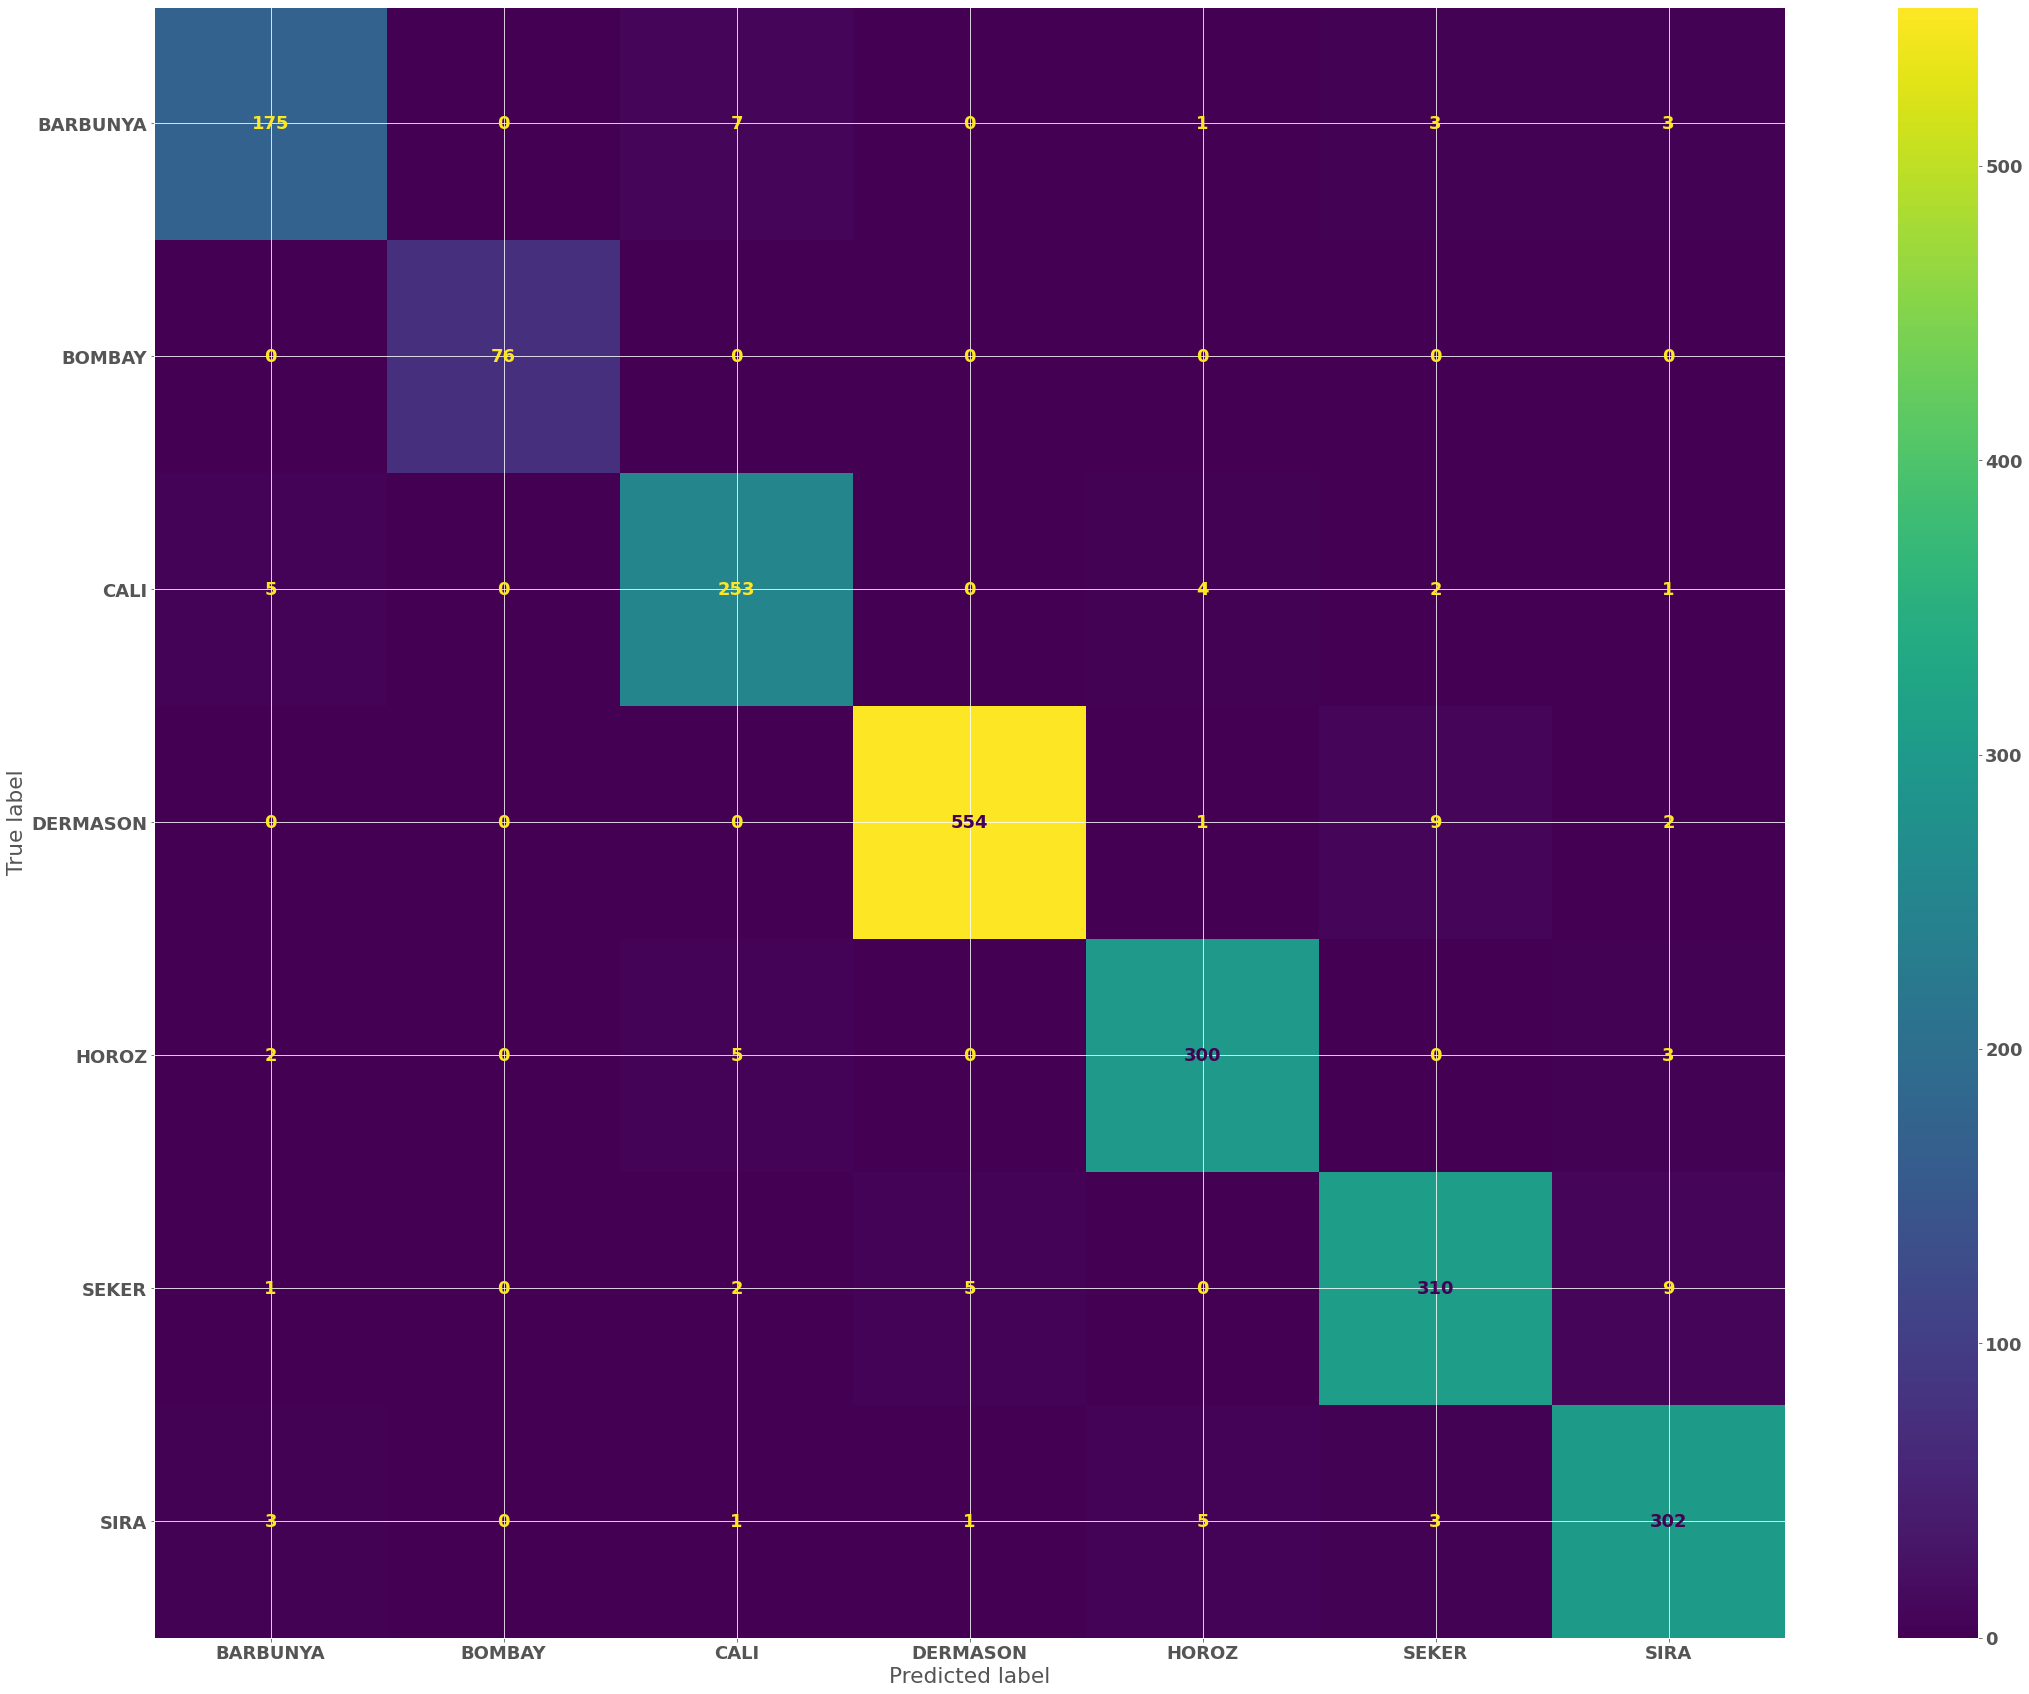

In [84]:
plot_confusion_matrix(support_vector_machine,x_val,y_val)

In [87]:
print(classification_report(y_true=y_val_p,y_pred=y_pred))

              precision    recall  f1-score   support

    BARBUNYA       0.24      0.30      0.27       232
      BOMBAY       0.04      0.05      0.04        79
        CALI       0.36      0.29      0.32       254
    DERMASON       0.79      0.95      0.86       555
       HOROZ       0.83      0.85      0.84       288
       SEKER       0.88      0.89      0.88       336
        SIRA       0.82      0.50      0.62       423

    accuracy                           0.66      2167
   macro avg       0.56      0.55      0.55      2167
weighted avg       0.68      0.66      0.66      2167



In [89]:
print('Avarage F1 Score:',f1_score(y_val_p,y_pred,average='micro'))

Avarage F1 Score: 0.6612828795569913


# ***5. Observations***

## **First** Observation, Preprocessing (**Standardization**):
* ### Model confused between **Sira** and **Dermason** **70** smaple miss classified
* ### Model confused between **Cali** and **Barbounya** **20** samples miss classified
* ### **Accuracy** score 94% and avarage **Accuracy** 92.77%
* ### Looking to improve **Dermason , Cali and Sira** scores which are the **worest** **F1** scores **93%,93%,89%**

## **Second** Observation, Preprocessing (**Standardization**,**Smote**):
* ### Model confused between **Sira** and **Dermason** **70** smaple miss classified
* ### Model confused between **Cali** and **Barbounya** **20** samples miss classified
* ### **Accuracy** score 94% and avarage **Accuracy** 94.6%
* ### Looking to improve **Dermason , Cali and Sira** scores which are the **worest** **F1** scores **93%,93%,90%**

# **6.** Submission file **generation**

In [ ]:
pls_test_data = pls2.transform(test_standardized)
pls_test_df = pd.DataFrame(pls_test_data)
# X_test_embedded = TSNE(n_components=3,perplexity=200, learning_rate=500, n_iter=1000).fit_transform(test_standardized)
# tsne_test_df = pd.DataFrame(X_test_embedded,columns=["axis1","axis2",'axis3'])
# test_transformed =  pd.concat([pca_test_df,tsne_test_df],axis=1)

NameError: name 'test_standardized' is not defined

In [ ]:
test_transformed = pls_test_df

In [ ]:
sub_df = pd.concat([test_df['ID'].reset_index(drop=True),pd.Series(support_vector_machine.predict(test_transformed),name='y')],axis=1)

In [ ]:
sub_df.y.value_counts()

DERMASON    713
SIRA        535
SEKER       400
HOROZ       375
CALI        322
BARBUNYA    260
BOMBAY      104
Name: y, dtype: int64

In [ ]:
sub_df.to_csv("./resources/submission.csv",index=False)